In [16]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [17]:
# Initialize Mediapipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)


In [18]:
# Load source and target images
source_img = cv2.imread('source.jpg')
target_img = cv2.imread('target.jpg')


In [19]:
# Function to get facial landmarks using Mediapipe
def get_landmarks(image):
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks:
        landmarks = []
        for landmark in results.multi_face_landmarks[0].landmark:
            landmarks.append([int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])])
        return np.array(landmarks)
    return None

In [20]:
# Get landmarks for both images
source_landmarks = get_landmarks(source_img)
target_landmarks = get_landmarks(target_img)

if source_landmarks is None or target_landmarks is None:
    print("Could not detect faces in one of the images.")
    exit()

In [21]:
# Select key points (eyes, nose, mouth)
source_points = np.float32([source_landmarks[33], source_landmarks[263], source_landmarks[1], source_landmarks[57], source_landmarks[287]])
target_points = np.float32([target_landmarks[33], target_landmarks[263], target_landmarks[1], target_landmarks[57], target_landmarks[287]])

# Calculate the affine transform matrix
M = cv2.getAffineTransform(source_points[:3], target_points[:3])

# Warp the source face to align with the target face
warped_source = cv2.warpAffine(source_img, M, (target_img.shape[1], target_img.shape[0]))

In [22]:
# Create a mask from the source face landmarks
hull = cv2.convexHull(target_landmarks)
mask = np.zeros(target_img.shape[:2], dtype=np.uint8)
cv2.fillConvexPoly(mask, hull, 255)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
# Poisson blending
center = (int(np.mean(target_landmarks[:, 0])), int(np.mean(target_landmarks[:, 1])))
output = cv2.seamlessClone(warped_source, target_img, mask, center, cv2.MIXED_CLONE)


In [24]:
# Convert BGR to RGB for displaying with matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

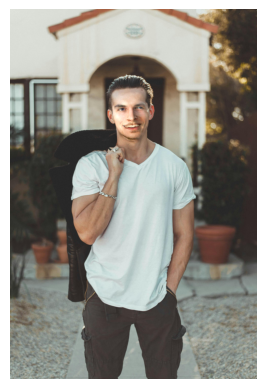

In [25]:
# Display the result using matplotlib
plt.imshow(output_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [26]:
# Save the result
cv2.imwrite('output.jpg', output)


True